In [1]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from util.munge import max_print
from data.county_data import cds_county_data

rcParams.figsize = 12, 4
plt.style.use("fivethirtyeight")
warnings.filterwarnings('ignore')

In [2]:
# get the datasets
vidx = pd.read_csv("data/COVID-19 Community Vulnerability Index (CCVI) - County CCVI.csv")\
    .rename(columns={"County":"county", "State":"state"})
vidx.columns = ["_".join(c.lower().split()) for c in vidx.columns]
counties = cds_county_data()

In [3]:
max_print(counties.head())

,county,state,cases,deaths,recovered,tested,active,population,populationDensity,rating,hospitalized,discharged,publishedDate
1072,Autauga,Alabama,25.0,1.0,NaN,NaN,NaN,55869.0,35.684291,0.490196,NaN,NaN,NaN
1073,Baldwin,Alabama,98.0,0.0,NaN,NaN,NaN,223234.0,51.095865,0.490196,NaN,NaN,NaN
1074,Barbour,Alabama,13.0,0.0,NaN,NaN,NaN,24686.0,10.484692,0.490196,NaN,NaN,NaN
1075,Bibb,Alabama,19.0,0.0,NaN,NaN,NaN,22394.0,13.758732,0.490196,NaN,NaN,NaN
1076,Blount,Alabama,17.0,0.0,NaN,NaN,NaN,57826.0,34.199827,0.490196,NaN,NaN,NaN


In [4]:
max_print(vidx.head())

,state,state_abbreviation,county,fips_(5-digit),theme_1:_socioeconomic_status,theme_2:_household_composition_&_disability,theme_3:_minority_status_&_language,theme_4:_housing_type_&_transportation,theme_5:_epidemiological_factors,theme_6:_healthcare_system_factors,ccvi_score_higher_=_more_vulnerable
0,Alabama,AL,Autauga,1001,0.357,0.566,0.592,0.314,0.833,0.935,0.777
1,Alabama,AL,Baldwin,1003,0.240,0.244,0.432,0.335,0.380,0.768,0.362
2,Alabama,AL,Barbour,1005,0.973,0.839,0.897,0.640,0.778,0.936,0.991
3,Alabama,AL,Bibb,1007,0.746,0.249,0.443,0.743,0.726,0.927,0.775
4,Alabama,AL,Blount,1009,0.635,0.432,0.583,0.322,0.630,0.509,0.612


In [5]:
df = counties.merge(vidx, how="left", on=["state","county"])

In [6]:
max_print(df.head())

,county,state,cases,deaths,recovered,tested,active,population,populationDensity,rating,hospitalized,discharged,publishedDate,state_abbreviation,fips_(5-digit),theme_1:_socioeconomic_status,theme_2:_household_composition_&_disability,theme_3:_minority_status_&_language,theme_4:_housing_type_&_transportation,theme_5:_epidemiological_factors,theme_6:_healthcare_system_factors,ccvi_score_higher_=_more_vulnerable
0,Autauga,Alabama,25.0,1.0,NaN,NaN,NaN,55869.0,35.684291,0.490196,NaN,NaN,NaN,AL,1001.0,0.357,0.566,0.592,0.314,0.833,0.935,0.777
1,Baldwin,Alabama,98.0,0.0,NaN,NaN,NaN,223234.0,51.095865,0.490196,NaN,NaN,NaN,AL,1003.0,0.240,0.244,0.432,0.335,0.380,0.768,0.362
2,Barbour,Alabama,13.0,0.0,NaN,NaN,NaN,24686.0,10.484692,0.490196,NaN,NaN,NaN,AL,1005.0,0.973,0.839,0.897,0.640,0.778,0.936,0.991
3,Bibb,Alabama,19.0,0.0,NaN,NaN,NaN,22394.0,13.758732,0.490196,NaN,NaN,NaN,AL,1007.0,0.746,0.249,0.443,0.743,0.726,0.927,0.775
4,Blount,Alabama,17.0,0.0,NaN,NaN,NaN,57826.0,34.199827,0.490196,NaN,NaN,NaN,AL,1009.0,0.635,0.432,0.583,0.322,0.630,0.509,0.612


### What % of states are reporting totals?

In [7]:
def get_reporting_counts(column):
    state_reporting = df.groupby("state")[column].sum().sort_values(ascending=False).reset_index(name=column)

    state_reporting[f"reporting_{column}"] = False
    state_reporting.loc[state_reporting[column] > 0, f"reporting_{column}"] = True
    return state_reporting[f"reporting_{column}"].value_counts()

In [8]:
get_reporting_counts("cases")

True     50
False     1
Name: reporting_cases, dtype: int64

In [9]:
get_reporting_counts("deaths")

True     37
False    14
Name: reporting_deaths, dtype: int64

In [10]:
get_reporting_counts("recovered")

False    44
True      7
Name: reporting_recovered, dtype: int64

In [11]:
get_reporting_counts("tested")

False    44
True      7
Name: reporting_tested, dtype: int64

Most states are reporting cases and deaths by county. Very few (7 total) are reporting negatives (total cases) and recoveries.

### Plot Vulnerability

In [12]:
# these are the states with the *most* complete numbers
high_dq_states = df.groupby("state")["tested"].sum().sort_values(ascending=False).head(7).index.to_list()
high_dq_states

['New York',
 'California',
 'Tennessee',
 'Wisconsin',
 'Oregon',
 'Arkansas',
 'North Dakota']

In [13]:
max_print(df.loc[df["state"].isin(high_dq_states)])

,county,state,cases,deaths,recovered,tested,active,population,populationDensity,rating,hospitalized,discharged,publishedDate,state_abbreviation,fips_(5-digit),theme_1:_socioeconomic_status,theme_2:_household_composition_&_disability,theme_3:_minority_status_&_language,theme_4:_housing_type_&_transportation,theme_5:_epidemiological_factors,theme_6:_healthcare_system_factors,ccvi_score_higher_=_more_vulnerable
67,Howard,Arkansas,11.0,0.0,4.0,50.0,7.0,13202.0,8.535814,0.647059,NaN,NaN,NaN,AR,5061.0,0.715,0.979,0.889,0.894,0.063,0.962,0.847
68,Pulaski,Arkansas,353.0,10.0,83.0,1890.0,260.0,391911.0,186.780696,0.647059,NaN,NaN,NaN,AR,5119.0,0.367,0.479,0.797,0.268,0.979,0.725,0.771
69,Lonoke,Arkansas,30.0,0.0,10.0,294.0,20.0,73309.0,35.190974,0.647059,NaN,NaN,NaN,AR,5085.0,0.393,0.384,0.394,0.212,0.383,0.762,0.418
70,Prairie,Arkansas,2.0,0.0,1.0,20.0,1.0,8062.0,4.602355,0.647059,NaN,NaN,NaN,AR,5117.0,0.729,0.777,0.177,0.935,0.822,0.789,0.891
71,Desha,Arkansas,6.0,0.0,1.0,62.0,5.0,11361.0,5.342649,0.647059,NaN,NaN,NaN,AR,5041.0,0.972,0.957,0.868,0.675,0.795,0.799,0.991
72,Phillips,Arkansas,4.0,1.0,0.0,54.0,3.0,17782.0,9.400871,0.647059,NaN,NaN,NaN,AR,5107.0,0.968,0.998,0.743,0.406,0.943,0.799,0.986
73,Searcy,Arkansas,6.0,0.0,1.0,93.0,5.0,7881.0,4.541035,0.647059,NaN,NaN,NaN,AR,5129.0,0.668,0.773,0.192,0.465,0.599,0.869,0.715
74,Independence,Arkansas,6.0,0.0,4.0,73.0,2.0,37825.0,18.910606,0.647059,NaN,NaN,NaN,AR,5063.0,0.630,0.812,0.429,0.684,0.300,0.775,0.665
75,Jackson,Arkansas,1.0,0.0,0.0,32.0,1.0,16719.0,10.015821,0.647059,NaN,NaN,NaN,AR,5067.0,0.879,0.609,0.298,0.708,0.621,0.958,0.832
76,Mississippi,Arkansas,7.0,0.0,5.0,59.0,2.0,40651.0,17.037938,0.647059,NaN,NaN,NaN,AR,5093.0,0.910,0.958,0.731,0.805,0.869,0.961,0.984


In [23]:
ny = df.loc[df["state"] == "New York"]
ny["log_cases"] = np.log(ny.cases)
ny["log_tested"] = np.log(ny.tested)

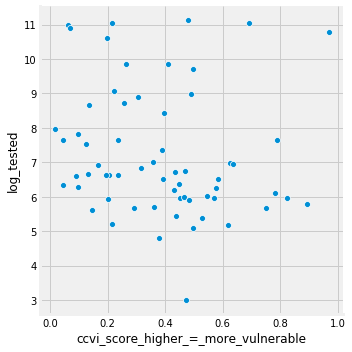

In [25]:
sns.relplot(x="ccvi_score_higher_=_more_vulnerable", y="log_tested", data=ny)